In [1]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data.catalog import DatasetCatalog
import sys, os


In [2]:
sys.path.insert(0, os.path.join('/home', 'raviakash', 'codebase'))
#file structure
path = os.path.join('/home', 'raviakash', 'codebase')
# Specify the directory containing your LabelMe annotations
labelme_folder = os.path.join(path, 'TestCase')

# Paths to JSON annotation files and image directories
train_json_file = os.path.join(labelme_folder, 'train_data', 'train_dataset.json')
val_json_file = os.path.join(labelme_folder, 'validation_data', 'validation_dataset.json')
image_root = os.path.join(labelme_folder, 'TestCase')

In [6]:
# Register training and validation datasets
register_coco_instances("TestCase_train", {}, train_json_file, f"{image_root}/train_data/images")
register_coco_instances("TestCase_validation", {}, val_json_file, f"{image_root}/validation_data/images")

catalog = DatasetCatalog.get("TestCase_train")
print(catalog)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



[{'file_name': '/home/raviakash/codebase/TestCase/train_data/data/Bentley_2024-02-28_11-44-57_2024-05-24-11-51-23_0296_0000.jpg', 'height': 512, 'width': 512, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [404.0, 356.0, 107.0, 75.0], 'category_id': 0, 'segmentation': [[511, 356, 457, 365, 425, 365, 405, 370, 404, 423, 511, 431]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': '/home/raviakash/codebase/TestCase/train_data/data/Bentley_2024-02-28_11-44-57_2024-05-24-11-51-23_0296_0001.jpg', 'height': 512, 'width': 512, 'image_id': 2, 'annotations': [{'iscrowd': 0, 'bbox': [148.0, 353.0, 217.0, 84.0], 'category_id': 0, 'segmentation': [[265, 353, 201, 365, 169, 365, 149, 370, 148, 423, 327, 437, 342, 437, 359, 428, 365, 410, 365, 399, 354, 353]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': '/home/raviakash/codebase/TestCase/train_data/data/Bentley_2024-02-28_11-44-57_2024-05-24-11-51-23_0332_0000.jpg', 'height': 512, 'width': 512, 'image_id': 3, 'annotations': [{'is

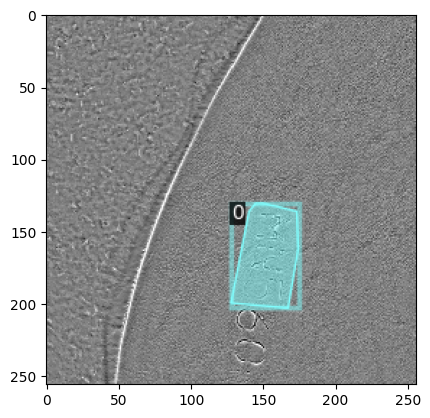

In [7]:
import random
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt
import cv2

for d in random.sample(catalog, 15):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])

In [8]:
y = DatasetCatalog.list()
print(y)

['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco_2017_val_panoptic_stuffonly', 'coco_2017_val_panoptic', 'coco_2017_val_100_panoptic_separated', 'coco_2017_val_100_panoptic_stuffonly', 'coco_2017_val_100_panoptic', 'lvis_v1_train', 'lvis_v1_val', 'lvis_v1_test_dev', 'lvis_v1_test_challenge', 'lvis_v0.5_train', 'lvis_v0.5_val', 'lvis_v0.5_val_rand_100', 'lvis_v0.5_test', 'lvis_v0.5_train_cocofied', 'lvis_v0.5_val_cocofied', 'cityscapes_fine_instance_seg_train', 'cityscapes_fine_sem_seg_train', 'citysca

In [9]:
import torch

if torch.cuda.is_available():
    print(f"CUDA Device Count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
        print(f"  CUDA Capability: {torch.cuda.get_device_capability(i)}")
else:
    print("CUDA not available.")

CUDA Device Count: 1
Device 0: NVIDIA GeForce RTX 4070 Laptop GPU
  CUDA Capability: (8, 9)
